In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GaussianNoise
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Add Gaussian noise to the input data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)


In [4]:
# Clip the values to the valid range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [5]:
# Define the architecture of the Denoising Autoencoder
input_size = 784
encoding_dim = 32


In [6]:
# Encoder
input_img = Input(shape=(input_size,))
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(input_size, activation='sigmoid')(encoded)

# Denoising Autoencoder model
denoising_autoencoder = Model(input_img, decoded)



In [7]:
# Compile the model
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [8]:
denoising_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:

# Train the Denoising Autoencoder
denoising_autoencoder.fit(x_train_noisy, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))


Epoch 1/50
235/235 [==============================] - 4s 12ms/step - loss: 0.2839 - val_loss: 0.2212
Epoch 2/50
235/235 [==============================] - 3s 13ms/step - loss: 0.2000 - val_loss: 0.1805
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1719 - val_loss: 0.1622
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1577 - val_loss: 0.1512
Epoch 5/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1487 - val_loss: 0.1438
Epoch 6/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1421 - val_loss: 0.1383
Epoch 7/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1372 - val_loss: 0.1343
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1335 - val_loss: 0.1309
Epoch 9/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1309 - val_loss: 0.1293
Epoch 10/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1295 - val_loss

In [10]:

# Encode and decode some noisy digits
decoded_imgs_denoising = denoising_autoencoder.predict(x_test_noisy)



313/313 [==============================] - 1s 2ms/step


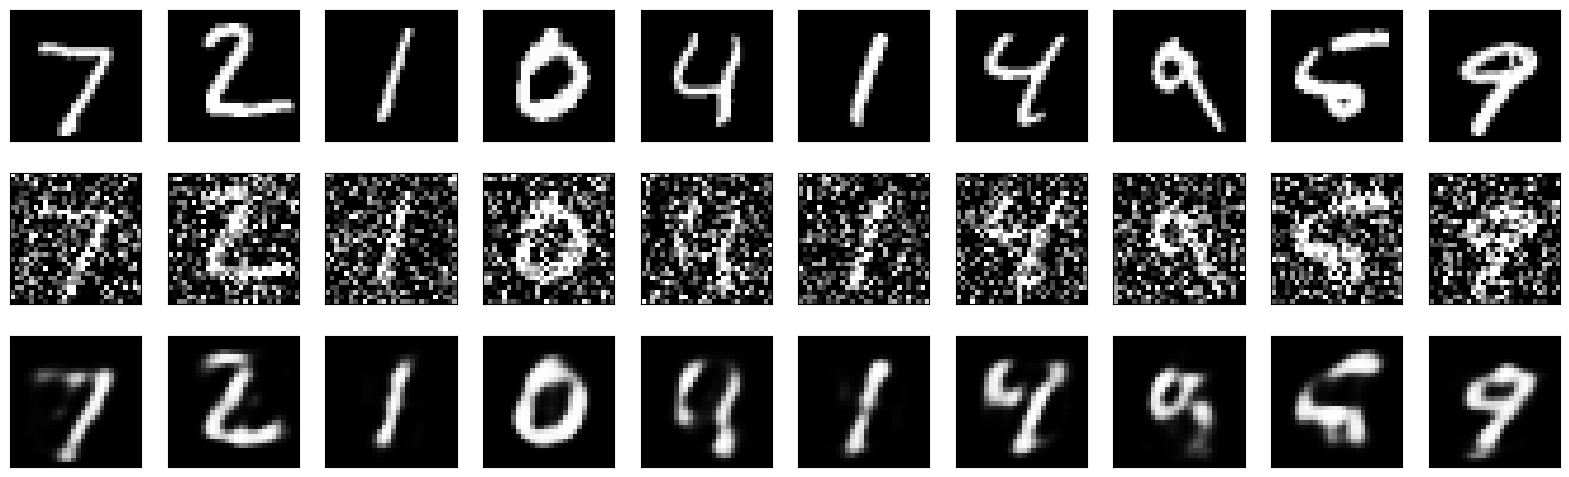

In [11]:
# Plotting original, noisy, and reconstructed images
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original Images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Noisy Images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed Images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs_denoising[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
